In [2]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 71.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [3]:
import pandas as pd
import numpy as np

#Read Data

In [22]:
data = pd.read_csv('complete_dataset_cleaned.csv')
data.pop('Pkey')
data.set_index('date', inplace=True)
data.pop('human_development_index')
data=data.iloc[:,:-2]


data.head()

,continent,location,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,gdp_percentage_weekly,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,,,,
7/17/2020,Africa,Algeria,13.423,0.113,1.20,0.0,74.07,NaN,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.403
7/18/2020,Africa,Algeria,13.604,0.249,1.18,0.0,74.07,NaN,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.517
7/20/2020,Africa,Algeria,13.740,0.204,1.15,0.0,74.07,NaN,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.449
7/21/2020,Africa,Algeria,13.287,0.294,1.14,0.0,74.07,NaN,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.268
7/22/2020,Africa,Algeria,13.446,0.249,1.13,0.0,74.07,NaN,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.154


In [23]:
data=data.iloc[:,1:]
data.pop('population_density')
data.pop('gdp_per_capita')
data.pop('cardiovasc_death_rate')
data.pop('diabetes_prevalence')
data.pop('female_smokers')
data.pop('male_smokers')
data.pop('hospital_beds_per_thousand')
data.pop('life_expectancy')
df=data
df

,location,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,gdp_percentage_weekly,icu_patients_per_million
date,,,,,,,,
7/17/2020,Algeria,13.423,0.113,1.20,0.0,74.07,NaN,1.403
7/18/2020,Algeria,13.604,0.249,1.18,0.0,74.07,NaN,1.517
7/20/2020,Algeria,13.740,0.204,1.15,0.0,74.07,NaN,1.449
7/21/2020,Algeria,13.287,0.294,1.14,0.0,74.07,NaN,1.268
7/22/2020,Algeria,13.446,0.249,1.13,0.0,74.07,NaN,1.154
...,...,...,...,...,...,...,...,...
10/7/2022,United States,217.809,1.166,0.86,0.0,25.99,NaN,7.875
10/8/2022,United States,22.659,0.139,0.86,0.0,25.99,NaN,7.772
10/9/2022,United States,14.905,0.012,0.86,0.0,25.99,NaN,7.852


In [25]:
c_countries=['Algeria', 'Argentina', 'Bulgaria', 'Chile', 'Romania', 'Serbia','South Africa']

In [26]:
data=data.loc[data['location'].isin(c_countries)]

In [27]:
data

,location,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,gdp_percentage_weekly,icu_patients_per_million
date,,,,,,,,
7/17/2020,Algeria,13.423,0.113,1.20,0.00,74.07,NaN,1.403
7/18/2020,Algeria,13.604,0.249,1.18,0.00,74.07,NaN,1.517
7/20/2020,Algeria,13.740,0.204,1.15,0.00,74.07,NaN,1.449
7/21/2020,Algeria,13.287,0.294,1.14,0.00,74.07,NaN,1.268
7/22/2020,Algeria,13.446,0.249,1.13,0.00,74.07,NaN,1.154
...,...,...,...,...,...,...,...,...
7/22/2022,South Africa,5.337,0.017,0.95,62.46,11.11,NaN,1.936
7/23/2022,South Africa,0.000,0.000,0.92,62.48,11.11,NaN,1.886
7/24/2022,South Africa,0.000,0.000,0.92,0.00,11.11,NaN,3.569


#Plot Your Data

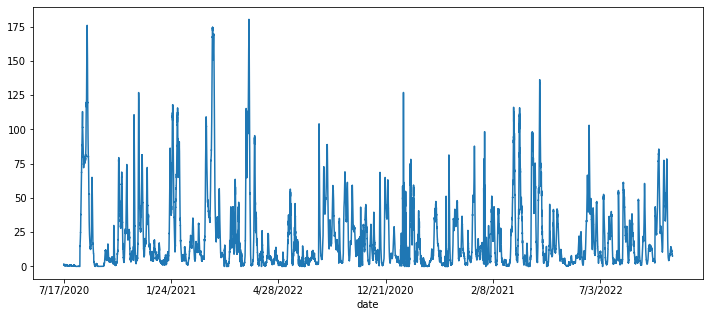

In [24]:
df['icu_patients_per_million'].plot(figsize=(12,5))

#Check For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['icu_patients_per_million'])

1. ADF :  -2.677109189166949
2. P-Value :  0.07808382940608465
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 797
5. Critical Values :
	 1% :  -3.438581476199162
	 5% :  -2.865173218890781
	 10% :  -2.56870466056054


#Figure Out Order for ARIMA Model

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['icu_patients_per_million'],exog=df.iloc[:,0:5], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,
                          suppress_warnings=True)           
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[14] intercept   : AIC=inf, Time=14.45 sec
 ARIMA(0,1,0)(0,0,0)[14] intercept   : AIC=2160.340, Time=0.63 sec
 ARIMA(1,1,0)(1,0,0)[14] intercept   : AIC=1742.250, Time=2.02 sec
 ARIMA(0,1,1)(0,0,1)[14] intercept   : AIC=1838.640, Time=2.27 sec
 ARIMA(0,1,0)(0,0,0)[14]             : AIC=2158.919, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[14] intercept   : AIC=1829.572, Time=0.48 sec
 ARIMA(1,1,0)(2,0,0)[14] intercept   : AIC=1744.009, Time=5.63 sec
 ARIMA(1,1,0)(1,0,1)[14] intercept   : AIC=1744.085, Time=3.17 sec
 ARIMA(1,1,0)(0,0,1)[14] intercept   : AIC=1767.807, Time=1.94 sec
 ARIMA(1,1,0)(2,0,1)[14] intercept   : AIC=1744.642, Time=12.91 sec
 ARIMA(0,1,0)(1,0,0)[14] intercept   : AIC=1869.709, Time=0.84 sec
 ARIMA(2,1,0)(1,0,0)[14] intercept   : AIC=1606.158, Time=1.34 sec
 ARIMA(2,1,0)(0,0,0)[14] intercept   : AIC=1708.086, Time=0.45 sec
 ARIMA(2,1,0)(2,0,0)[14] intercept   : AIC=1592.344, Time=4.41 sec
 ARIMA(2,1,0)(2,0,1)[1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  819
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 14)   Log Likelihood                -699.325
Date:                            Mon, 02 Jan 2023   AIC                           1418.649
Time:                                    00:40:24   BIC                           1465.718
Sample:                                07-15-2020   HQIC                          1436.712
                                     - 10-11-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.002      0.201      0.841      -0.003       0.004
ar.L1          0.5614      0.050     11.237      0.000       0.463       0.659
ar.L2          0.2212      0.026      8.405      0.000       0.170       0.273
ar.L3         -0.0022      0.016     -0.134      0.894      -0.034       0.030
ar.L4         -0.0846      0.028     -3.020      0.003      -0.140      -0.030
ar.L5          0.2843      0.026     10.783      0.000       0.233       0.336
ma.L1         -0.4839      0.057     -8.502      0.000      -0.596      -0.372
ar.S.L14       0.9560      0.014     67.329      0.000       0.928       0.984
ma.S.L14      -0.8151      0.033    -24.477      0.000      -0.880      -0.750
sigma2         0.3186      0.007     45.524      0.000       0.305       0.332
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             32210.00
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                            -2.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#model=auto_arima(df['icu_patients'], start_p=0, start_q=0, d=0,max_p=5,max_q=5,max_d=5,start_P=0,D=0,start_Q=0, max_P=5, max_D=5, max_Q=5, seasonal= True, information_criteria='AIC' )
#model.summary()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#Split Data into Training and Testing

In [ ]:
print(df.shape)
train=df.iloc[:-30,[0,1,2,3,4,13]]
test=df.iloc[-30:,[0,1,2,3,4,13]]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(819, 14)
(789, 6) (30, 6)


In [ ]:
train.head()

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,icu_patients_per_million
date,,,,,,
7/15/2020,197.013,2.858,1.13,0.0,68.98,27.433
7/16/2020,210.135,2.887,1.11,0.0,68.98,29.071
7/17/2020,196.868,2.733,1.10,0.0,68.98,31.751
7/18/2020,190.782,2.638,1.09,0.0,68.98,32.531
7/19/2020,175.028,1.433,1.08,0.0,68.98,30.466


In [ ]:
test.head()

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,icu_patients_per_million
date,,,,,,
9/12/2022,206.254,1.359,0.90,184.89,26.02,10.605
9/13/2022,236.465,1.537,0.88,185.04,26.02,10.359
9/14/2022,307.429,2.878,0.86,185.20,26.02,10.190
9/15/2022,247.141,1.973,0.85,185.37,26.01,10.003
9/16/2022,167.443,1.273,0.86,185.56,26.01,9.807


In [ ]:
ts=df['icu_patients_per_million']
ts

date
7/15/2020     27.433
7/16/2020     29.071
7/17/2020     31.751
7/18/2020     32.531
7/19/2020     30.466
               ...  
10/7/2022      7.875
10/8/2022      7.772
10/9/2022      7.852
10/10/2022     7.855
10/11/2022     7.757
Name: icu_patients_per_million, Length: 819, dtype: float64

In [ ]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(ts, model='additive')
#result.plot()
#plt.show()

## Train the Model

In [ ]:
model=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:1] ,order=(5,1,1),seasonal_order=(1,0,1,30) )
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:         icu_patients_per_million   No. Observations:                  789
Model:             ARIMA(5, 1, 1)x(1, 0, 1, 30)   Log Likelihood                -741.403
Date:                          Mon, 02 Jan 2023   AIC                           1502.806
Time:                                  00:40:47   BIC                           1549.501
Sample:                              07-15-2020   HQIC                          1520.757
                                   - 09-11-2022                                         
Covariance Type:                            opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
new_cases_per_million     0.0003   8.04e-05      4.280      0.000       0.000       0.001
ar.L1                     0.3393      0.038      8.881      0.000       0.264       0.414
ar.L2                     0.1919      0.021      9.069      0.000       0.150       0.233
ar.L3                     0.0462      0.018      2.593      0.010       0.011       0.081
ar.L4                    -0.0917      0.021     -4.281      0.000      -0.134      -0.050
ar.L5                     0.3915      0.016     24.026      0.000       0.360       0.423
ma.L1                    -0.2881      0.044     -6.494      0.000      -0.375      -0.201
ar.S.L30                  0.0186      0.228      0.082      0.935      -0.428       0.465
ma.S.L30                 -0.2160      0.231     -0.935      0.350      -0.669       0.237
sigma2                    0.3581      0.006     55.144      0.000       0.345       0.371
===================================================================================
Ljung-Box (L1) (Q):                   3.01   Jarque-Bera (JB):             22267.79
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            -1.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Make Predictions on Test Set

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(exog=test.iloc[:,0:1],start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

date
9/12/2022     10.337376
9/13/2022     10.267083
9/14/2022     10.236856
9/15/2022      9.866967
9/16/2022      9.767004
9/17/2022      9.557316
9/18/2022      9.497893
9/19/2022      9.506171
9/20/2022      9.334193
9/21/2022      9.278805
9/22/2022      9.171331
9/23/2022      9.122116
9/24/2022      8.937595
9/25/2022      8.816094
9/26/2022      8.805450
9/27/2022      8.769658
9/28/2022      8.730075
9/29/2022      8.702706
9/30/2022      8.577899
10/1/2022      8.503847
10/2/2022      8.457406
10/3/2022      8.519854
10/4/2022      8.470600
10/5/2022      8.388988
10/6/2022      8.293699
10/7/2022      8.254664
10/8/2022      8.130751
10/9/2022      8.108863
10/10/2022     8.237127
10/11/2022     8.218401
Name: predicted_mean, dtype: float64


In [ ]:
#model.forecast()

In [ ]:
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
#pred.index=index_future_dates
#pred.plot(legend=True)
#test['AvgTemp'].plot(legend=True)

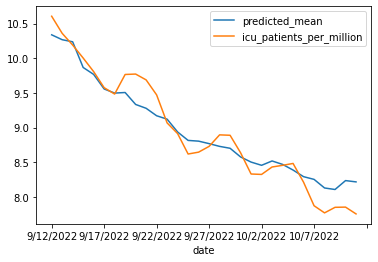

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)

In [ ]:
test['icu_patients_per_million'].mean()

8.9494

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)


0.22527205397031644


# PREPING DATA FOR ANN



In [ ]:
predicted_list, error_list = [], []
training_data = train


In [ ]:
model = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:1] ,order=(5,1,1),seasonal_order=(1,0,1,30))
model_fit = model.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1] - predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    print('predicted=%f, expected=%f error=%f' % (predicted_value, obs,abs(predicted_value-obs)))


predicted=10.337376, expected=10.605000 error=0.267624
predicted=10.267083, expected=10.359000 error=0.091917
predicted=10.236856, expected=10.190000 error=0.046856
predicted=9.866967, expected=10.003000 error=0.136033
predicted=9.767004, expected=9.807000 error=0.039996
predicted=9.557316, expected=9.576000 error=0.018684
predicted=9.497893, expected=9.484000 error=0.013893
predicted=9.506171, expected=9.766000 error=0.259829
predicted=9.334193, expected=9.772000 error=0.437807
predicted=9.278805, expected=9.688000 error=0.409195
predicted=9.171331, expected=9.472000 error=0.300669
predicted=9.122116, expected=9.068000 error=0.054116
predicted=8.937595, expected=8.914000 error=0.023595
predicted=8.816094, expected=8.620000 error=0.196094
predicted=8.805450, expected=8.647000 error=0.158450
predicted=8.769658, expected=8.730000 error=0.039658
predicted=8.730075, expected=8.896000 error=0.165925
predicted=8.702706, expected=8.890000 error=0.187294
predicted=8.577899, expected=8.638000 e

In [ ]:
print(error_list)


[0.2676240370089715, 0.09191657970325373, -0.046855501961527324, 0.13603331830193, 0.039995745060631194, 0.01868360944963321, -0.013892755693245107, 0.25982856864729165, 0.43780691320446685, 0.4091953528015857, 0.3006690881067655, -0.05411598852983879, -0.02359524818560388, -0.19609396629766174, -0.15845032699621875, -0.03965828900370383, 0.1659248884483162, 0.18729400630227566, 0.0601009629484377, -0.17184695636448133, -0.13140609051650642, -0.08685350006303771, -0.01360049946103814, 0.09501205114441724, -0.0796989837510278, -0.3796642029085966, -0.3587506005888663, -0.2568629260691484, -0.3821265564091352, -0.4614005106889856]


In [ ]:
# test_resid = []
# for i in resid_test:
#     test_resid.append(i[0])

error = mean_squared_error(test.iloc[0:30,-1], predicted_list[0:30])
print('Test MSE: %.3f' % error)

Test MSE: 0.051


In [ ]:
training_error = model_fit.resid


In [ ]:
training_error=np.array(training_error)
training_error

array([ 2.73652395e+01,  1.63348265e+00,  2.24842235e+00, -2.50013612e-01,
       -3.32983390e+00,  2.36674645e+00,  1.33433597e-02,  1.44767552e+00,
        2.91259765e+00, -9.64350031e-01,  2.54016224e-01, -6.55418081e+00,
        4.35407865e+00, -2.38708271e-01, -2.25411160e+00, -7.92547499e-02,
        2.30339340e+00, -2.15747564e+00, -2.02358577e+00,  1.31082103e+00,
       -6.77823942e-01, -2.67540744e-01, -3.13710673e-01,  2.54792582e-01,
       -1.15801456e+00, -1.23377233e-01,  5.03596906e-01,  1.60890746e-01,
       -3.98045299e-01, -6.65107192e-02,  2.85093254e-01, -3.34499607e-01,
       -1.13401338e-01,  3.39087518e-01, -9.67709766e-02, -4.61403970e-01,
       -5.17456778e-01,  2.46930340e-01,  2.87298357e-01, -3.04788493e-02,
        5.27024620e-01, -9.75546688e-01,  5.74869687e-01, -9.82035177e-01,
       -1.06961078e-01, -1.15759082e-01,  2.86478699e-01, -1.91385455e-01,
        2.58644570e-01,  1.69691151e-01, -2.22296255e-01,  2.56046504e-01,
       -2.40671037e-01, -

#**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=7, activation="tanh"))
model.add(Dense(50,  activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam')



In [ ]:
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])


In [ ]:
train_X

[array([ 2.73652395e+01,  1.63348265e+00,  2.24842235e+00, -2.50013612e-01,
        -3.32983390e+00,  2.36674645e+00,  1.33433597e-02]),
 array([ 1.63348265,  2.24842235, -0.25001361, -3.3298339 ,  2.36674645,
         0.01334336,  1.44767552]),
 array([ 2.24842235, -0.25001361, -3.3298339 ,  2.36674645,  0.01334336,
         1.44767552,  2.91259765]),
 array([-0.25001361, -3.3298339 ,  2.36674645,  0.01334336,  1.44767552,
         2.91259765, -0.96435003]),
 array([-3.3298339 ,  2.36674645,  0.01334336,  1.44767552,  2.91259765,
        -0.96435003,  0.25401622]),
 array([ 2.36674645,  0.01334336,  1.44767552,  2.91259765, -0.96435003,
         0.25401622, -6.55418081]),
 array([ 0.01334336,  1.44767552,  2.91259765, -0.96435003,  0.25401622,
        -6.55418081,  4.35407865]),
 array([ 1.44767552,  2.91259765, -0.96435003,  0.25401622, -6.55418081,
         4.35407865, -0.23870827]),
 array([ 2.91259765, -0.96435003,  0.25401622, -6.55418081,  4.35407865,
        -0.23870827, -2.254

In [ ]:
train_X=np.array(train_X)
train_Y=np.array(train_Y)

In [ ]:
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)

In [ ]:
print(new_train_X)

[[ 2.73652395e+01  1.63348265e+00  2.24842235e+00 ... -3.32983390e+00
   2.36674645e+00  1.33433597e-02]
 [ 1.63348265e+00  2.24842235e+00 -2.50013612e-01 ...  2.36674645e+00
   1.33433597e-02  1.44767552e+00]
 [ 2.24842235e+00 -2.50013612e-01 -3.32983390e+00 ...  1.33433597e-02
   1.44767552e+00  2.91259765e+00]
 ...
 [-5.96217735e-03 -3.92635680e-01  1.79820811e-01 ...  1.60449955e-01
   4.53122359e-02  1.71478293e-01]
 [-3.92635680e-01  1.79820811e-01  3.35863932e-01 ...  4.53122359e-02
   1.71478293e-01 -1.09274960e-01]
 [ 1.79820811e-01  3.35863932e-01  1.60449955e-01 ...  1.71478293e-01
  -1.09274960e-01 -8.52931008e-01]]


In [ ]:
model.fit(new_train_X,new_train_Y, epochs=400, batch_size=20,verbose=1)


Epoch 1/400
40/40 [==============================] - 1s 2ms/step - loss: 0.3229
Epoch 2/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2904
Epoch 3/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2732
Epoch 4/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2686
Epoch 5/400
40/40 [==============================] - 0s 2ms/step - loss: 0.2579
Epoch 6/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2628
Epoch 7/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2429
Epoch 8/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2375
Epoch 9/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2313
Epoch 10/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2879
Epoch 11/400
40/40 [==============================] - 0s 2ms/step - loss: 0.2257
Epoch 12/400
40/40 [==============================] - 0s 3ms/step - loss: 0.2157
Epoch 13/400
40/40 [=================

In [ ]:
# test_extended = error_list
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)


In [ ]:
test_data = np.array(test_data)

In [ ]:
test_data

array([ 0.26762404,  0.09191658, -0.0468555 ,  0.13603332,  0.03999575,
        0.01868361, -0.01389276,  0.25982857,  0.43780691,  0.40919535,
        0.30066909, -0.05411599, -0.02359525, -0.19609397, -0.15845033,
       -0.03965829,  0.16592489,  0.18729401,  0.06010096, -0.17184696,
       -0.13140609, -0.0868535 , -0.0136005 ,  0.09501205, -0.07969898,
       -0.3796642 , -0.3587506 , -0.25686293, -0.38212656, -0.46140051])

In [ ]:

test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])


In [ ]:
new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)
 


In [ ]:
predictions = model.predict(new_test_X)
predictions


1/1 [==============================] - 0s 100ms/step


array([[ 0.11427516],
       [-0.02289784],
       [-0.19425604],
       [ 0.16831952],
       [ 0.04950651],
       [-0.03935883],
       [ 0.23708537],
       [-0.08669958],
       [-0.20021957],
       [ 0.28716537],
       [ 0.30502066],
       [-0.18904951],
       [ 0.02855568],
       [ 0.45194715],
       [-0.48403245],
       [ 0.20573547],
       [-0.04164805],
       [ 0.22058323],
       [ 0.13799578],
       [-0.34767717],
       [ 0.14753056],
       [ 0.27495652],
       [-0.22649184]], dtype=float32)

In [ ]:
Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

In [ ]:
pred

,0
0,0.114275
1,-0.022898
2,-0.194256
3,0.168320
4,0.049507
5,-0.039359
6,0.237085
7,-0.086700
8,-0.200220
9,0.287165


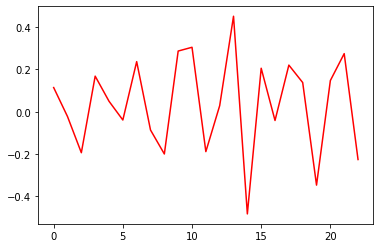

Test MSE: 0.111


In [ ]:
import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)


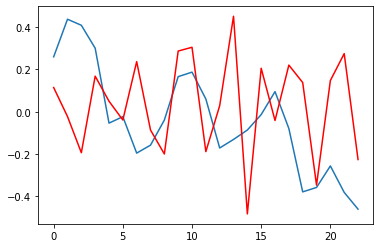

Test MSE: 0.111


In [ ]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)


#**Calculating the sum of prediction value by arima and amount error by the ann***

In [ ]:
np.shape(pred)

(23, 1)

In [ ]:
np.shape(pred)

(23, 1)

In [ ]:
np.shape(predicted_list[7:])

(23,)

In [ ]:
type(pred)
pred=np.array(pred)

In [ ]:
pred= pred.tolist()

In [ ]:
#predicted_list=predicted_list.tolist()

In [ ]:
l= len(pred)


In [ ]:
print(l)

23


In [ ]:
pred_final=[]

In [ ]:
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)


In [ ]:
np.shape(pred_final)

(23, 1)

In [ ]:
error = mse(test.iloc[:23,-1],pred_final)
print('Test MSE: %.3f' % error)

Test MSE: 0.070


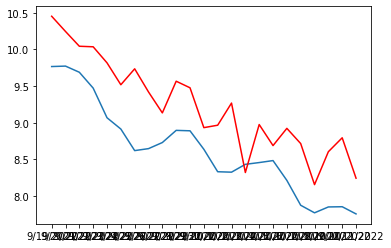

In [ ]:
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()

# **Predicting for new country**

In [ ]:
unclean_data=pd.read_csv('complete_dataset_uncleaned.csv')

In [ ]:
data3=unclean_data[unclean_data.location=='India']
data3

,Pkey,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
86685,India43860,Asia,India,1/30/2020,0.001,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
86686,India43861,Asia,India,1/31/2020,0.000,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
86687,India43862,Asia,India,2/1/2020,0.000,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
86688,India43863,Asia,India,2/2/2020,0.001,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
86689,India43864,Asia,India,2/3/2020,0.001,NaN,NaN,NaN,10.19,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87667,India44842,Asia,India,10/8/2022,1.958,0.015,NaN,155.54,NaN,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
87668,India44843,Asia,India,10/9/2022,1.722,0.011,NaN,155.57,NaN,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
87669,India44844,Asia,India,10/10/2022,1.390,0.006,NaN,155.59,NaN,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN
87670,India44845,Asia,India,10/11/2022,NaN,0.009,NaN,155.63,NaN,450.419,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,NaN


In [ ]:
data3=data3.iloc[:,2:]
data3.pop('location')
data3.pop('population_density')
data3.pop('gdp_per_capita')
data3.pop('cardiovasc_death_rate')
data3.pop('diabetes_prevalence')
data3.pop('female_smokers')
data3.pop('male_smokers')
data3.pop('hospital_beds_per_thousand')
data3.pop('life_expectancy')
data3.set_index('date', inplace=True)
data3.tail()

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,icu_patients_per_million
date,,,,,,
10/8/2022,1.958,0.015,NaN,155.54,NaN,NaN
10/9/2022,1.722,0.011,NaN,155.57,NaN,NaN
10/10/2022,1.390,0.006,NaN,155.59,NaN,NaN
10/11/2022,NaN,0.009,NaN,155.63,NaN,NaN
10/12/2022,3.612,0.009,NaN,155.68,NaN,NaN


In [ ]:
data3=data3.dropna(subset=['new_cases_per_million'])

In [ ]:
traini=data3.iloc[:-30,:]
testi=data3.iloc[-30:,:]
start=len(traini)
end=len(traini)+len(testi)-1

In [ ]:
testi

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,icu_patients_per_million
date,,,,,,
9/12/2022,1.267,0.014,0.86,152.95,37.04,NaN
9/13/2022,5.466,0.022,0.90,153.11,37.04,NaN
9/14/2022,4.562,0.024,0.88,153.25,37.04,NaN
9/15/2022,4.474,0.016,0.89,153.47,37.04,NaN
9/16/2022,4.083,0.021,0.89,153.60,37.04,NaN
9/17/2022,4.024,0.025,0.89,153.77,37.04,NaN
9/18/2022,3.451,0.013,0.89,153.88,37.04,NaN
9/19/2022,2.872,0.011,0.88,153.97,37.04,NaN
9/20/2022,1.365,0.023,0.87,154.06,37.04,NaN


In [ ]:
model=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:1] ,order=(5,1,1),seasonal_order=(1,0,1,30) )
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:         icu_patients_per_million   No. Observations:                  789
Model:             ARIMA(5, 1, 1)x(1, 0, 1, 30)   Log Likelihood                -741.403
Date:                          Mon, 02 Jan 2023   AIC                           1502.806
Time:                                  00:42:31   BIC                           1549.501
Sample:                              07-15-2020   HQIC                          1520.757
                                   - 09-11-2022                                         
Covariance Type:                            opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
new_cases_per_million     0.0003   8.04e-05      4.280      0.000       0.000       0.001
ar.L1                     0.3393      0.038      8.881      0.000       0.264       0.414
ar.L2                     0.1919      0.021      9.069      0.000       0.150       0.233
ar.L3                     0.0462      0.018      2.593      0.010       0.011       0.081
ar.L4                    -0.0917      0.021     -4.281      0.000      -0.134      -0.050
ar.L5                     0.3915      0.016     24.026      0.000       0.360       0.423
ma.L1                    -0.2881      0.044     -6.494      0.000      -0.375      -0.201
ar.S.L30                  0.0186      0.228      0.082      0.935      -0.428       0.465
ma.S.L30                 -0.2160      0.231     -0.935      0.350      -0.669       0.237
sigma2                    0.3581      0.006     55.144      0.000       0.345       0.371
===================================================================================
Ljung-Box (L1) (Q):                   3.01   Jarque-Bera (JB):             22267.79
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            -1.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(exog=testi.iloc[:,0:1],start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

date
9/12/2022     10.266873
9/13/2022     10.187634
9/14/2022     10.132688
9/15/2022      9.783504
9/16/2022      9.710818
9/17/2022      9.550058
9/18/2022      9.493593
9/19/2022      9.450411
9/20/2022      9.264227
9/21/2022      9.180560
9/22/2022      9.090228
9/23/2022      9.038354
9/24/2022      8.929027
9/25/2022      8.810429
9/26/2022      8.760080
9/27/2022      8.708565
9/28/2022      8.642747
9/29/2022      8.617757
9/30/2022      8.544651
10/1/2022      8.496667
10/2/2022      8.452320
10/3/2022      8.478268
10/4/2022      8.414941
10/5/2022      8.316965
10/6/2022      8.245615
10/7/2022      8.180435
10/8/2022      8.123631
10/9/2022      8.104329
10/10/2022     8.215278
10/11/2022     8.170203
Name: predicted_mean, dtype: float64


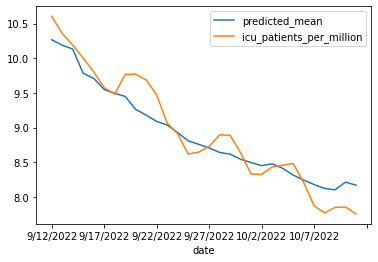

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)